In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
records = pd.read_csv('Newsdata_Records.csv')
records.head()

,TITLE,ARTICLE LINK,PUBLISHED DATE (GMT),AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL
0,"""Mark Cuban Calls Elon Musk 'Judge And Jury' O...",https://www.benzinga.com/news/22/11/29885272/m...,2022-11-29 12:36:03,NaN,Benzinga,United States Of America,Top,English,"Elon Musk-led Twitter lacks transparency, acco...",NaN,NaN
1,"""Twitter's 'Big Bang' — Elon Musk's 'General A...",https://www.benzinga.com/news/22/11/29881698/t...,2022-11-29 11:35:43,NaN,Benzinga,United States Of America,Top,English,Twitter is going through a rollercoaster ride....,NaN,NaN
2,"""Twitter owner Musk signals new 'war' against ...",https://techxplore.com/news/2022-11-twitter-ow...,2022-11-29 09:39:18,NaN,Phys.org,United States Of America,Technology,English,Twitter owner Elon Musk on Monday opened fire ...,NaN,NaN
3,"""Chinese police are now conducting random stop...",https://www.businessinsider.com/chinese-police...,2022-11-29 08:30:16,NaN,Business Insider,United States Of America,Top,English,Certain foreign social media apps are banned i...,NaN,NaN
4,"""Twitter Downloads Surge In China Amid Protest...",https://www.benzinga.com/news/22/11/29882264/t...,2022-11-29 07:48:17,NaN,Benzinga,United States Of America,Top,English,read more,NaN,NaN


In [3]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TITLE                 5348 non-null   object 
 1   ARTICLE LINK          5348 non-null   object 
 2   PUBLISHED DATE (GMT)  5348 non-null   object 
 3   AUTHOR                2939 non-null   object 
 4   PUBLISHER             5348 non-null   object 
 5   COUNTRY               5348 non-null   object 
 6   CATEGORY              5348 non-null   object 
 7   LANGUAGE              5348 non-null   object 
 8   DESCRIPTION           4894 non-null   object 
 9   IMAGE URL             0 non-null      float64
 10  VIDEO URL             60 non-null     object 
dtypes: float64(1), object(10)
memory usage: 459.7+ KB


In [7]:
# check rate of NAs
np.sum(records.isna())

TITLE                      0
ARTICLE LINK               0
PUBLISHED DATE (GMT)       0
AUTHOR                  2409
PUBLISHER                  0
COUNTRY                    0
CATEGORY                   0
LANGUAGE                   0
DESCRIPTION              454
IMAGE URL               5348
VIDEO URL               5288
dtype: int64

In [10]:
na_perc = round(np.sum(records.isna()) / len(records) *100, 2)
na_perc
# image url and video url contains too many nas, and it's not related to our analysis, we can drop them

TITLE                     0.00
ARTICLE LINK              0.00
PUBLISHED DATE (GMT)      0.00
AUTHOR                   45.04
PUBLISHER                 0.00
COUNTRY                   0.00
CATEGORY                  0.00
LANGUAGE                  0.00
DESCRIPTION               8.49
IMAGE URL               100.00
VIDEO URL                98.88
dtype: float64

In [14]:
# drop the columns
records = records.drop(['IMAGE URL', 'VIDEO URL'], axis = 1)

In [16]:
proper_colname = [colname.title() for colname in records.columns]
records.columns = proper_colname

In [20]:
records.head()

,Title,Article Link,Published Date (Gmt),Author,Publisher,Country,Category,Language,Description
0,"""Mark Cuban Calls Elon Musk 'Judge And Jury' O...",https://www.benzinga.com/news/22/11/29885272/m...,2022-11-29 12:36:03,NaN,Benzinga,United States Of America,Top,English,"Elon Musk-led Twitter lacks transparency, acco..."
1,"""Twitter's 'Big Bang' — Elon Musk's 'General A...",https://www.benzinga.com/news/22/11/29881698/t...,2022-11-29 11:35:43,NaN,Benzinga,United States Of America,Top,English,Twitter is going through a rollercoaster ride....
2,"""Twitter owner Musk signals new 'war' against ...",https://techxplore.com/news/2022-11-twitter-ow...,2022-11-29 09:39:18,NaN,Phys.org,United States Of America,Technology,English,Twitter owner Elon Musk on Monday opened fire ...
3,"""Chinese police are now conducting random stop...",https://www.businessinsider.com/chinese-police...,2022-11-29 08:30:16,NaN,Business Insider,United States Of America,Top,English,Certain foreign social media apps are banned i...
4,"""Twitter Downloads Surge In China Amid Protest...",https://www.benzinga.com/news/22/11/29882264/t...,2022-11-29 07:48:17,NaN,Benzinga,United States Of America,Top,English,read more


In [21]:
records.Author.value_counts()

AP                                                       81
Thomas Barrabi                                           49
Hayley Hynes                                             47
The Canadian Press                                       46
Reuters                                                  45
                                                         ..
Matt Wilstein                                             1
Brian C. Keegan                                           1
Dan Milmo Global technology editor and Johana Bhuiyan     1
Chris Williams                                            1
Jessica Corbett                                           1
Name: Author, Length: 882, dtype: int64

In [28]:
# fill NaN entries in Author with "Unknown"
records.loc[records.Author.isna(), 'Author'] = 'Unknown'
records.head()

,Title,Article Link,Published Date (Gmt),Author,Publisher,Country,Category,Language,Description
0,"""Mark Cuban Calls Elon Musk 'Judge And Jury' O...",https://www.benzinga.com/news/22/11/29885272/m...,2022-11-29 12:36:03,Unknown,Benzinga,United States Of America,Top,English,"Elon Musk-led Twitter lacks transparency, acco..."
1,"""Twitter's 'Big Bang' — Elon Musk's 'General A...",https://www.benzinga.com/news/22/11/29881698/t...,2022-11-29 11:35:43,Unknown,Benzinga,United States Of America,Top,English,Twitter is going through a rollercoaster ride....
2,"""Twitter owner Musk signals new 'war' against ...",https://techxplore.com/news/2022-11-twitter-ow...,2022-11-29 09:39:18,Unknown,Phys.org,United States Of America,Technology,English,Twitter owner Elon Musk on Monday opened fire ...
3,"""Chinese police are now conducting random stop...",https://www.businessinsider.com/chinese-police...,2022-11-29 08:30:16,Unknown,Business Insider,United States Of America,Top,English,Certain foreign social media apps are banned i...
4,"""Twitter Downloads Surge In China Amid Protest...",https://www.benzinga.com/news/22/11/29882264/t...,2022-11-29 07:48:17,Unknown,Benzinga,United States Of America,Top,English,read more


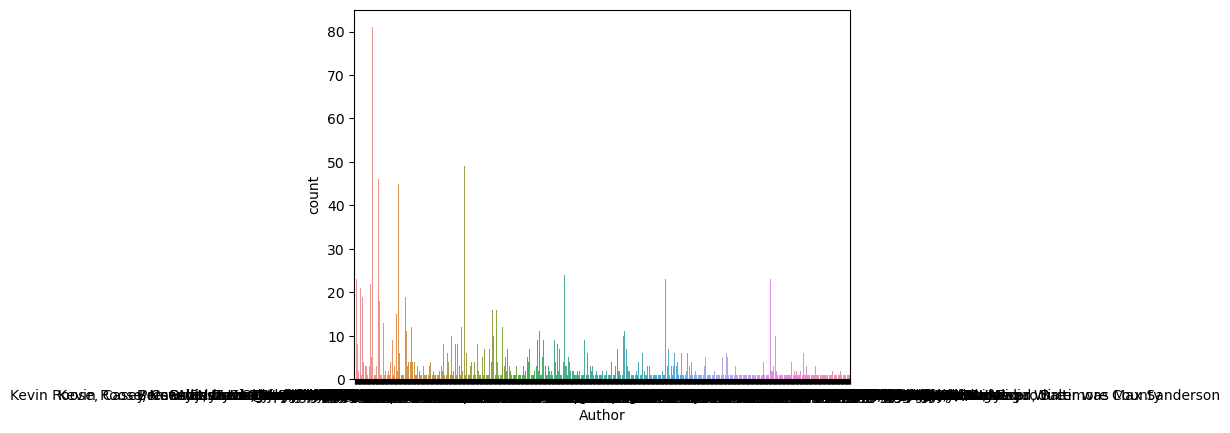

In [32]:
sns.countplot(x = 'Author', data = records[records['Author'] != 'Unknown'])

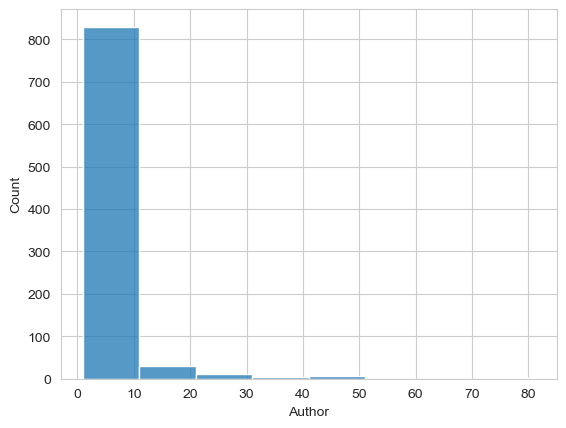

In [52]:
author_count = records[records['Author'] != 'Unknown']['Author'].value_counts()
sns.histplot(x = author_count, bins = 8, palette = 'viridis')

In [40]:
author_count['AP']

81

In [50]:
records.groupby('Publisher').filter(lambda x: len(x) > 50)['Publisher'].value_counts()

Google News                                   544
Business Insider                              376
New York Post                                 300
Forbes                                        191
The Verge                                     173
Phys.org                                      145
Wsj                                           141
Tech Crunch                                   140
Hot New Hip Hop                               135
Engadget                                      134
Fox News                                      133
Yahoo! News                                   118
Slashgear                                     112
Teslarati                                     106
Tweak Town                                     97
Benzinga                                       93
Cnet                                           91
The Washington Times , America’s Newspaper     80
Cbs News                                       73
Ars Technica                                   73


In [55]:
records.head()

,Title,Article Link,Published Date (Gmt),Author,Publisher,Country,Category,Language,Description
0,"""Mark Cuban Calls Elon Musk 'Judge And Jury' O...",https://www.benzinga.com/news/22/11/29885272/m...,2022-11-29 12:36:03,Unknown,Benzinga,United States Of America,Top,English,"Elon Musk-led Twitter lacks transparency, acco..."
1,"""Twitter's 'Big Bang' — Elon Musk's 'General A...",https://www.benzinga.com/news/22/11/29881698/t...,2022-11-29 11:35:43,Unknown,Benzinga,United States Of America,Top,English,Twitter is going through a rollercoaster ride....
2,"""Twitter owner Musk signals new 'war' against ...",https://techxplore.com/news/2022-11-twitter-ow...,2022-11-29 09:39:18,Unknown,Phys.org,United States Of America,Technology,English,Twitter owner Elon Musk on Monday opened fire ...
3,"""Chinese police are now conducting random stop...",https://www.businessinsider.com/chinese-police...,2022-11-29 08:30:16,Unknown,Business Insider,United States Of America,Top,English,Certain foreign social media apps are banned i...
4,"""Twitter Downloads Surge In China Amid Protest...",https://www.benzinga.com/news/22/11/29882264/t...,2022-11-29 07:48:17,Unknown,Benzinga,United States Of America,Top,English,read more


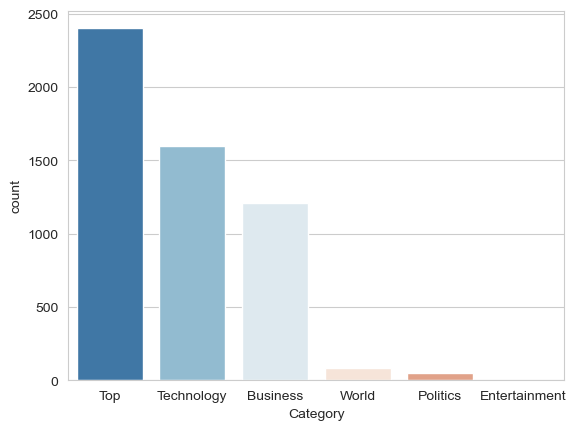

In [58]:
sns.countplot(x = 'Category', data = records, palette = 'RdBu_r')

In [88]:
records.loc[records.Description.isna(), 'Description'] = 'No Description'

In [94]:
# show entries with duplicates not related to read more nor NaN
records_dup = records[records.duplicated(subset = 'Description')]

In [99]:
records_dup[(records_dup['Description'] != 'read more') & (records_dup['Description'] != 'No Description')]

,Title,Article Link,Published Date (Gmt),Author,Publisher,Country,Category,Language,Description
106,"""Twitter Users Warned Not To Delete Their Acco...",https://www.forbes.com/sites/daveywinder/2022/...,2022-11-25 14:00:00,"Davey Winder, Senior Contributor",Forbes,United States Of America,Technology,English,"If you're fed up with Twitter, deleting your a..."
124,"""Elon Musk says he's granting 'amnesty' to sus...",https://abc7.com/elon-musk-twitter-amnesty-elo...,2022-11-25 00:29:05,AP,Abc7,United States Of America,Technology,English,The billionaire's announcement came after he a...
125,"""Elon Musk says he's granting 'amnesty' to sus...",https://abc7news.com/elon-musk-twitter-amnesty...,2022-11-25 00:11:28,AP,Abc7,United States Of America,Top,English,The billionaire's announcement came after he a...
153,"""Looking to leave Twitter? Here are the social...",https://www.npr.org/2022/11/24/1139079748/leav...,2022-11-24 10:00:38,Laurel Wamsley,Npr,United States Of America,Top,English,Can a network like Hive Social or Mastodon fos...
226,"""Twitter Lays Off Some Sales Employees After T...",https://www.wsj.com/articles/twitter-lays-off-...,2022-11-22 03:16:00,Unknown,Wsj,United States Of America,Technology,English,The new cuts follow mass layoffs and resignati...
...,...,...,...,...,...,...,...,...,...
5279,"""Elon Musk threatens to walk away from Twitter...",https://www.kcra.com/article/elon-musk-threate...,2022-06-06 14:11:00,Unknown,Kcra,United States Of America,Top,English,Elon Musk is threatening to end his $44 billio...
5280,"""Elon Musk threatens to walk away from Twitter...",https://www.wcvb.com/article/elon-musk-threate...,2022-06-06 14:11:00,Unknown,Wcvb,United States Of America,Top,English,Elon Musk is threatening to end his $44 billio...
5281,"""Musk threatens to walk away from Twitter deal""",https://techxplore.com/news/2022-06-musk-threa...,2022-06-06 14:10:33,Unknown,Phys.org,United States Of America,Technology,English,Elon Musk is threatening to walk away from his...
5288,"""Elon Musk threatens to walk away from Twitter...",https://www.chicagotribune.com/business/ct-biz...,2022-06-06 13:50:27,TOM KRISHER,Chicago Tribune,United States Of America,Business,English,Elon Musk is threatening to end his $44 billio...


In [103]:
records = records.drop_duplicates(subset = 'Title')
records.to_csv('records.csv')

In [7]:
records = pd.read_csv('records.csv', index_col = 0)

In [45]:
# Process datetime feature

In [36]:
# add a week column to the data
date_str = [date[:10] for date in records.iloc[:,2]]

from datetime import datetime
date_obj = [datetime.strptime(date, "%Y-%m-%d") for date in date_str]
records['Date'] = date_obj

Here's a simple time series chart to see the trends of the number of Twitter-related news over the months

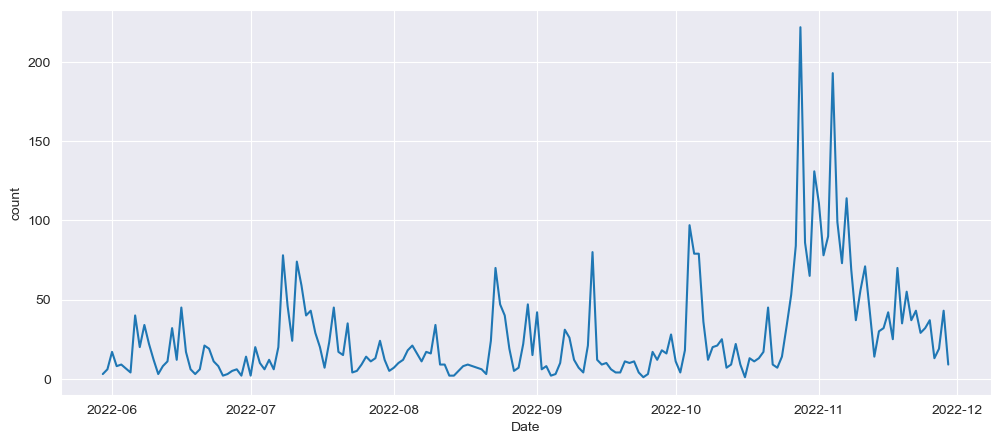

In [44]:
counts = records.groupby(["Date"]).size().reset_index(name="count")
sns.set_style('darkgrid')
plt.figure(figsize = (12, 5))
sns.lineplot(data=counts, x="Date", y="count")

In [46]:
# aggregate the category feature, combine low frequency categories like world, politics, and entertainment to 'other' column
records['Category'].unique()

array(['Top', 'Technology', 'Business', 'World', 'Politics',
       'Entertainment'], dtype=object)

In [50]:
def combine_other(category):
    if category not in ['Top', 'Technology', 'Business']:
        return 'Other'
    else:
        return category
combined_cat = [combine_other(cat) for cat in records['Category']]
set(combined_cat)

{'Business', 'Other', 'Technology', 'Top'}

In [51]:
records['Category'] = combined_cat

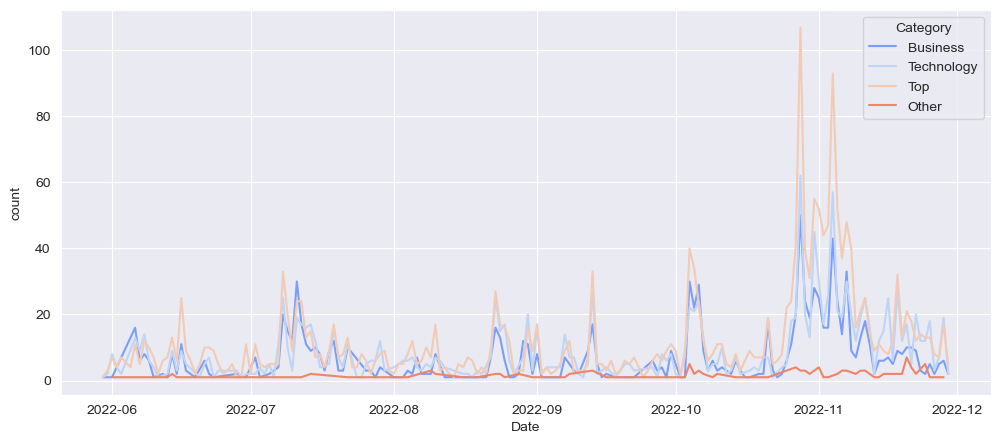

In [84]:
counts = records.groupby(["Date", "Category"]).size().reset_index(name="count")
plt.figure(figsize = (12, 5))
sns.lineplot(data=counts, x="Date", y="count", hue = 'Category', palette = "coolwarm", ci = 80)

In [90]:
counts.head()

,Date,Category,count
0,2022-05-30,Business,1
1,2022-05-30,Technology,1
2,2022-05-30,Top,1
3,2022-05-31,Business,1
4,2022-05-31,Technology,2


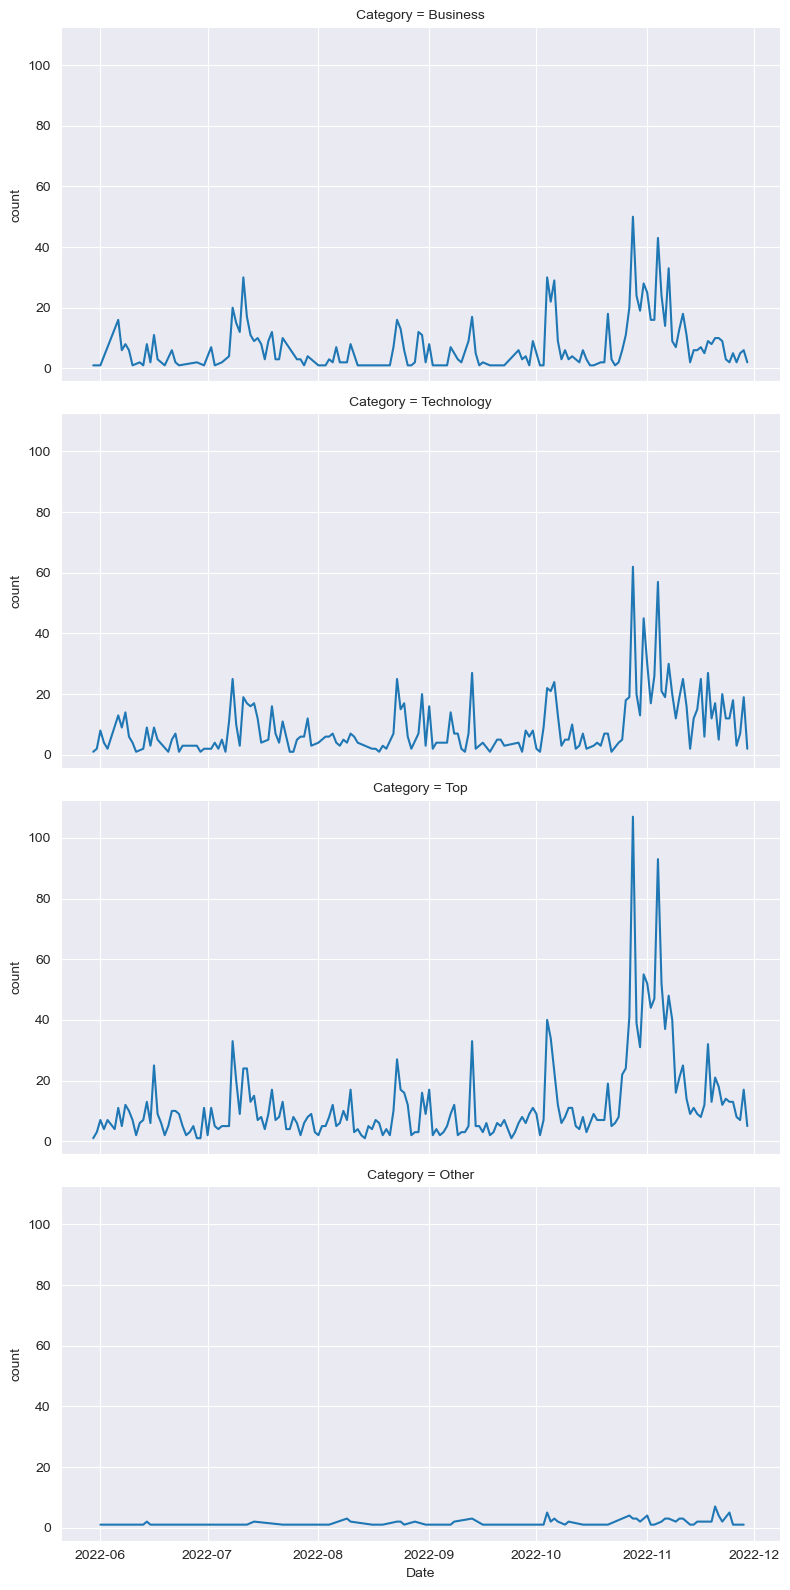

In [103]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(counts, row = 'Category', height = 4, aspect = 2)
g.map(sns.lineplot, "Date", "count")

In [108]:
# create an interactive version
import cufflinks as cf
import plotly.offline
cf.go_offline()
import plotly.express as px

In [111]:
custom_palette = ['#3b4cc0', '#a7a7e6', '#f0b98d', '#d61818']
fig = px.line(counts, x="Date", y="count", color="Category", color_discrete_sequence=custom_palette)
fig

In [112]:
plotly.offline.plot(fig, filename='.html')

'name.html'

In [104]:
records.head()

,Title,Article Link,Published Date (Gmt),Author,Publisher,Country,Category,Language,Description,Date
0,"""Mark Cuban Calls Elon Musk 'Judge And Jury' O...",https://www.benzinga.com/news/22/11/29885272/m...,2022-11-29 12:36:03,Unknown,Benzinga,United States Of America,Top,English,"Elon Musk-led Twitter lacks transparency, acco...",2022-11-29
1,"""Twitter's 'Big Bang' — Elon Musk's 'General A...",https://www.benzinga.com/news/22/11/29881698/t...,2022-11-29 11:35:43,Unknown,Benzinga,United States Of America,Top,English,Twitter is going through a rollercoaster ride....,2022-11-29
2,"""Twitter owner Musk signals new 'war' against ...",https://techxplore.com/news/2022-11-twitter-ow...,2022-11-29 09:39:18,Unknown,Phys.org,United States Of America,Technology,English,Twitter owner Elon Musk on Monday opened fire ...,2022-11-29
3,"""Chinese police are now conducting random stop...",https://www.businessinsider.com/chinese-police...,2022-11-29 08:30:16,Unknown,Business Insider,United States Of America,Top,English,Certain foreign social media apps are banned i...,2022-11-29
4,"""Twitter Downloads Surge In China Amid Protest...",https://www.benzinga.com/news/22/11/29882264/t...,2022-11-29 07:48:17,Unknown,Benzinga,United States Of America,Top,English,read more,2022-11-29


In [107]:
records.to_csv('records_2')